1031
4096


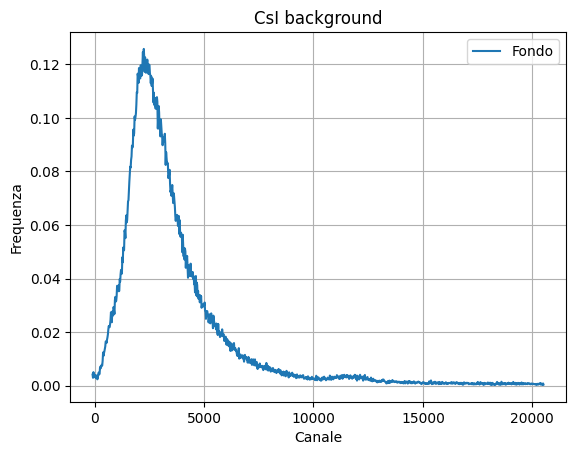

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\Black\Desktop\Esperimentazioni di Nucleare e Subnucleare\SiPM\Caratterizzazione Cristalli\CsI\Fondo CsI\Misura di fondo CSI.CSV', sep=';')
data1 = pd.read_csv(r'C:\Users\Black\Desktop\Esperimentazioni di Nucleare e Subnucleare\SiPM\Caratterizzazione Cristalli\CsI\Cobalto\SpettroCo_2ndRun_300s.csv', sep=' \t', engine='python')

print(len(data['Channel']))
print(len(data1['Channel']))


channel_back = np.array(data['Channel']) #taglio i dati per avere lo stesso numero di elementi
counts_back = np.array(data['Counts'])
time_back = 14270 #s
frequency_back = counts_back/time_back

channel_Co = np.array(data1['Channel'][:1031])
counts_Co = np.array(data1['Counts'][:1031])
time_Co = 300 #s
frequency_Co = counts_Co/time_Co

plt.plot(channel_back, frequency_back, label='Fondo')
plt.xlabel('Canale')
plt.ylabel('Frequenza')
plt.title('CsI background')
plt.legend()
plt.grid()
plt.show()

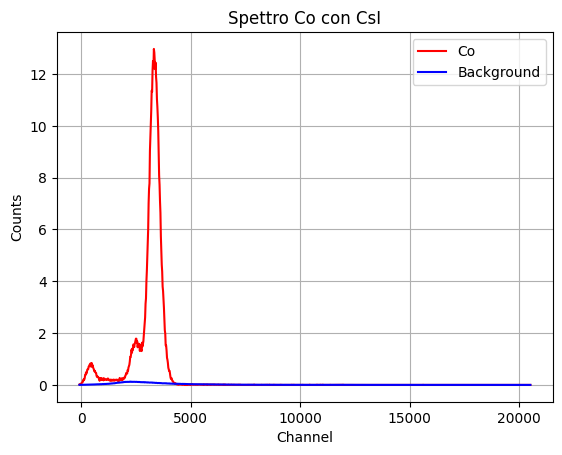

In [2]:
plt.plot(channel_Co, frequency_Co, marker='', linestyle='-', color='red', label='Co')
plt.plot(channel_back, frequency_back, marker='', linestyle='-', color='blue', label='Background')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Spettro Co con CsI')
plt.legend()
plt.grid()
plt.show()

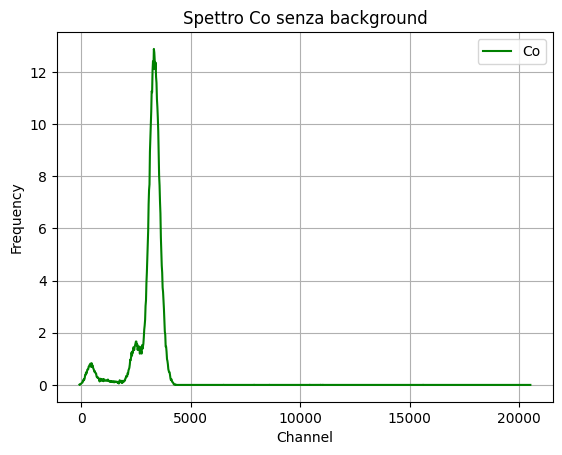

In [3]:
channel = channel_back
frequency = frequency_Co - frequency_back

for i in range(len(frequency)):
    if frequency[i] < 0:
        frequency[i] = 0

plt.plot(channel, frequency, marker='', linestyle='-', color='green', label='Co')
plt.xlabel('Channel')
plt.ylabel('Frequency')
plt.legend()
plt.title('Spettro Co senza background')
plt.grid()

In [4]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import norm, chi2


def repeat_fit(ls, left_bound, right_bound, mu, sigma, A, ampiezza_picco_limite, dis=False, limit_ADC=100):
    '''
    ampiezza picco limite = è la ampiezza dell'intorno di mu in cui è accettabile avere il picco
    '''
    peak_list = []
    error_peak_list = []
    sigma_list = []
    error_sigma_list = []
    for delta_ADC in np.arange(0, abs(right_bound-left_bound)/2+limit_ADC, 10):
        ls.mask = (channel > left_bound+delta_ADC) & (channel < right_bound-delta_ADC)
        m = Minuit(ls, mu=mu, sigma=sigma, A=A)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['mu'] < (mu+ampiezza_picco_limite/2) and m.values['mu'] > (mu-ampiezza_picco_limite/2):    
                peak_list.append(m.values['mu'])
                error_peak_list.append(m.errors['mu'])
                sigma_list.append(m.values['sigma'])
                error_sigma_list.append(m.errors['sigma'])
                if dis==True: display(m)
        ls.mask = None
    for delta_ADC in np.arange(0, abs(right_bound-left_bound)/2+limit_ADC, 10):
        ls.mask = (channel > left_bound+delta_ADC) & (channel < right_bound-delta_ADC/2)
        m = Minuit(ls, mu=mu, sigma=sigma, A=A)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['mu'] < (mu+ampiezza_picco_limite/2) and m.values['mu'] > (mu-ampiezza_picco_limite/2):    
                peak_list.append(m.values['mu'])
                error_peak_list.append(m.errors['mu'])
                sigma_list.append(m.values['sigma'])
                error_sigma_list.append(m.errors['sigma'])
                if dis==True: display(m)
        ls.mask = None
    for delta_ADC in np.arange(0, abs(right_bound-left_bound)/2+limit_ADC, 10):
        ls.mask = (channel > left_bound+delta_ADC/2) & (channel < right_bound-delta_ADC)
        m = Minuit(ls, mu=mu, sigma=sigma, A=A)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['mu'] < (mu+ampiezza_picco_limite/2) and m.values['mu'] > (mu-ampiezza_picco_limite/2):    
                peak_list.append(m.values['mu'])
                error_peak_list.append(m.errors['mu'])
                sigma_list.append(m.values['sigma'])
                error_sigma_list.append(m.errors['sigma'])
                if dis==True: display(m)
        ls.mask = None
    return np.array(peak_list), np.array(error_peak_list), np.array(sigma_list), np.array(error_sigma_list)

In [5]:
def func(x, mu, sigma, A):
    return A * norm.pdf(x, mu, sigma)

error = np.sqrt(counts_Co)/time_Co

ls = LeastSquares(channel, frequency, error, func)

peak_list14_4, error_peak_list14_4, sigma_list14_4, err_sigma_list14_4 = repeat_fit(ls, 200, 700, 440, 100, 1, 80, dis=False, limit_ADC=100)
print(peak_list14_4)
print(error_peak_list14_4)

[430.30734705 433.04963548 433.04963548 429.62408703 429.62408703
 427.80401726 427.80401726 424.6729328  424.6729328  426.44750285
 426.44750285 414.77624427 414.77624427 430.30734705 432.94098842
 433.04963548 430.98300655 430.98300655 429.05187007 428.51211299
 430.79718623 430.79718623 424.01967125 405.51585022 419.75577358
 444.8327718  439.13224425 430.30734705 430.62042425 433.04963548
 431.04050819 431.04050819 429.47632834 428.45943068 427.11556027
 427.11556027 428.34590071 430.0608721  419.74293007 419.74293007
 422.09251724 427.21517763 431.63880632 431.63880632]
[  4.89740925   5.15842308   5.15842308   5.6907985    5.6907985
   6.39886453   6.39886453  10.97586603  10.97586603  13.82921565
  13.82921565  34.9425698   34.9425698    4.89740925   5.04898765
   5.15842308   5.91466596   5.91466596   7.03801115   6.60968277
   7.30985509   7.30985509  15.32494067  42.18944558  30.58190799
  36.4346277   51.28438013   4.89740925   5.05892496   5.15842308
   5.07063118   5.07063

In [6]:
peak_list122_1, error_peak_list122_1, sigma_list122_1, err_sigma_list122_1 = repeat_fit(ls, 2850, 3840, 3315, 300, 13, 80, dis=False, limit_ADC=100)
print(peak_list122_1)
print(error_peak_list122_1)

[3334.59830737 3334.75181589 3334.45135618 3334.39248221 3333.90865445
 3333.7679822  3333.69456087 3333.15054983 3333.24233296 3332.53788436
 3332.74282402 3333.0206999  3332.53377631 3332.70155411 3331.86383616
 3331.82144017 3332.0644757  3331.25547164 3330.70371596 3331.01096589
 3330.31889315 3323.9731764  3323.30782969 3323.7591122  3332.85536359
 3333.02222139 3333.02222139 3333.00909178 3333.00909178 3330.68850936
 3330.68850936 3331.05835899 3331.05835899 3332.07718532 3332.07718532
 3326.76581834 3326.76581834 3327.74733038 3327.74733038 3332.40002111
 3332.40002111 3341.71467109 3341.71467109 3334.63871931 3334.61849717
 3334.27872552 3334.27872552 3333.69140954 3333.87884812 3333.77273471
 3333.77273471 3333.84175665 3333.74097348 3333.90586881 3333.90586881
 3333.11655765 3333.21190247 3332.78224169 3332.78224169 3332.31308148
 3332.31715355 3333.18871662 3333.18871662 3332.97039471 3332.99475204
 3328.06944306 3328.06944306 3327.75270408 3327.75270408 3328.32736957
 3326.

In [7]:
def weighted_mean(values, errors):
    mean = np.sum(values/(errors**2))/np.sum(1/(errors**2))
    error_mean = np.sqrt((abs(np.max(values) - np.min(values))/2)**2 + (1/np.sum(1/(errors**2))))
    return mean, error_mean

# first peak at 14.4 keV
mean14_4, error_mean14_4 = weighted_mean(peak_list14_4, error_peak_list14_4)
print(mean14_4, error_mean14_4)

# second peak at 122.1 keV
mean122_1, error_mean122_1 = weighted_mean(peak_list122_1, error_peak_list122_1)
print(mean122_1, error_mean122_1)

print('----------------------------')

print(weighted_mean(sigma_list14_4, err_sigma_list14_4))
print(weighted_mean(sigma_list122_1, err_sigma_list122_1))

429.96874270511046 19.687008690946804
3333.3858987743347 9.360091670113635
----------------------------
(197.67785609543995, 31.096238135292676)
(235.71071366579994, 22.557882232684015)
